In [1]:
!git clone https://github.com/Khajaul/Python_for_data_Analysis.git

Cloning into 'Python_for_data_Analysis'...
remote: Enumerating objects: 141, done.
remote: Counting objects: 100% (141/141), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 141 (delta 110), reused 141 (delta 110), pack-reused 0
Receiving objects: 100% (141/141), 75.19 MiB | 22.12 MiB/s, done.
Resolving deltas: 100% (110/110), done.
Checking out files: 100% (134/134), done.


In [3]:
%cd Python_for_data_Analysis/

/content/Python_for_data_Analysis


# 1) Import Data

In [0]:
import numpy as np

In [0]:
X_train = np.genfromtxt("Train/X_train.txt")
Y_train = np.genfromtxt("Train/y_train.txt")
X_test = np.genfromtxt("Test/X_test.txt")
Y_test = np.genfromtxt("Test/y_test.txt")

In [127]:
tab = []
with open("features.txt", "r") as features:
    for line in features.readlines():
        tab.append(line)

tab

['tBodyAcc-Mean-1                \n',
 'tBodyAcc-Mean-2                \n',
 'tBodyAcc-Mean-3                \n',
 'tBodyAcc-STD-1                 \n',
 'tBodyAcc-STD-2                 \n',
 'tBodyAcc-STD-3                 \n',
 'tBodyAcc-Mad-1                 \n',
 'tBodyAcc-Mad-2                 \n',
 'tBodyAcc-Mad-3                 \n',
 'tBodyAcc-Max-1                 \n',
 'tBodyAcc-Max-2                 \n',
 'tBodyAcc-Max-3                 \n',
 'tBodyAcc-Min-1                 \n',
 'tBodyAcc-Min-2                 \n',
 'tBodyAcc-Min-3                 \n',
 'tBodyAcc-SMA-1                 \n',
 'tBodyAcc-Energy-1              \n',
 'tBodyAcc-Energy-2              \n',
 'tBodyAcc-Energy-3              \n',
 'tBodyAcc-IQR-1                 \n',
 'tBodyAcc-IQR-2                 \n',
 'tBodyAcc-IQR-3                 \n',
 'tBodyAcc-ropy-1                \n',
 'tBodyAcc-ropy-1                \n',
 'tBodyAcc-ropy-1                \n',
 'tBodyAcc-ARCoeff-1             \n',
 'tBodyAcc-A

# 2) DataFrame Creation

In [0]:
import pandas as pd

## 1 - Train Dataframes

In [0]:
df_X_train = pd.DataFrame(X_train,columns=tab)
df_Y_train = pd.DataFrame(Y_train,columns=["classe"])

#### Add labels to classes

In [130]:
dict = {}
tab1 = []
with open("activity_labels.txt", "r") as classes:
    for line in classes.readlines():
        line = line.strip()
        values = line.split(" ",2)
        values[0] = values[0] + '.0'
        dict[float(values[0])] = values[1]

dict

{1.0: 'WALKING',
 2.0: 'WALKING_UPSTAIRS',
 3.0: 'WALKING_DOWNSTAIRS',
 4.0: 'SITTING',
 5.0: 'STANDING',
 6.0: 'LAYING',
 7.0: 'STAND_TO_SIT',
 8.0: 'SIT_TO_STAND',
 9.0: 'SIT_TO_LIE',
 10.0: 'LIE_TO_SIT',
 11.0: 'STAND_TO_LIE',
 12.0: 'LIE_TO_STAND'}

In [0]:
df_Y_train['labels'] = df_Y_train['classe'].map(mapping)

## 2- Test Dataframes

In [0]:
df_X_test = pd.DataFrame(X_test,columns=tab)
df_Y_test = pd.DataFrame(Y_test,columns=["classe"])

# 3) Search fo missing values

In [0]:
import seaborn as sns

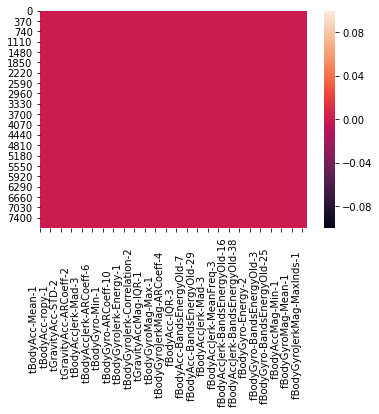

In [134]:
sns.heatmap(df_X_train.isna())

Comme nous pouvons le voir ici il n'y as aucune valeur manquante dans le dataset.

# 4) Data Visualisation

In [0]:
base = pd.concat([df_X_train,df_Y_train], axis=1)

In [136]:
base.columns

Index(['tBodyAcc-Mean-1                \n',
       'tBodyAcc-Mean-2                \n',
       'tBodyAcc-Mean-3                \n',
       'tBodyAcc-STD-1                 \n',
       'tBodyAcc-STD-2                 \n',
       'tBodyAcc-STD-3                 \n',
       'tBodyAcc-Mad-1                 \n',
       'tBodyAcc-Mad-2                 \n',
       'tBodyAcc-Mad-3                 \n',
       'tBodyAcc-Max-1                 \n',
       ...
       'fBodyGyroJerkMag-Kurtosis-1    \n',
       'tBodyAcc-AngleWRTGravity-1     \n',
       'tBodyAccJerk-AngleWRTGravity-1 \n',
       'tBodyGyro-AngleWRTGravity-1    \n',
       'tBodyGyroJerk-AngleWRTGravity-1\n',
       'tXAxisAcc-AngleWRTGravity-1    \n',
       'tYAxisAcc-AngleWRTGravity-1    \n',
       'tZAxisAcc-AngleWRTGravity-1    \n', 'classe', 'labels'],
      dtype='object', length=563)

Text(0.5, 0.98, "lien entre tBodyAcc-Max-1 l'activité du patient")

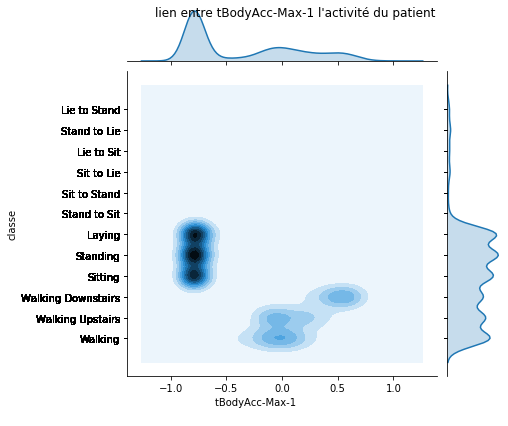

In [137]:
%matplotlib inline
g = sns.jointplot(base['tBodyAcc-Max-1                 \n'], base["classe"], kind="kde")
g.ax_joint.set_yticks(df_Y_train["classe"])
g.ax_joint.set_yticklabels(df_Y_train['labels'])
g.fig.suptitle("lien entre tBodyAcc-Max-1 l'activité du patient")

comme nous pouvons le voir ici la BodyAcceleration étant a -1 quand la personne ne bouge pas les modèles pourais donc utiliser cette valuer pour définir ces 3 positions de plus elle pourais distinguer walking upstairs et downstairs grace a cette valeur ca l'on peut voir une modification de l'accélération entre les deux.

# 5) Modelisation

In [0]:
from collections import OrderedDict

In [0]:
performances = {}

## 1- Testing model performance function

In [0]:
def get_score(algorithme, X_train, X_test, Y_train, Y_test):
    modele     = algorithme.fit(X_train, Y_train)
    score      = modele.score(X_test, Y_test)
    return score

## 2- DecisionTreeClassifier

In [0]:
from sklearn.tree import DecisionTreeClassifier
hyperparametres = {"random_state" : 100}
algorithme = DecisionTreeClassifier(**hyperparametres)
score = get_score(algorithme, X_train, X_test, Y_train, Y_test)
performances[algorithme] = score

In [0]:
from sklearn.tree import DecisionTreeClassifier
hyperparametres = {"random_state" : 1}
algorithme = DecisionTreeClassifier(**hyperparametres)
score = get_score(algorithme, X_train, X_test, Y_train, Y_test)
performances[algorithme] = score

In [0]:
from sklearn.tree import DecisionTreeClassifier
hyperparametres = {"random_state" : 42}
algorithme = DecisionTreeClassifier(**hyperparametres)
score = get_score(algorithme, X_train, X_test, Y_train, Y_test)
performances[algorithme] = score

In [164]:
dico_ordonne = OrderedDict(performances)
df = pd.DataFrame()
df["perf"] = dico_ordonne.values()
df["algo"] = dico_ordonne.keys()
df["nom_algo"] = df.algo.map(lambda algo: str(algo).split("(")[0])
df

,perf,algo,nom_algo
0,0.802024,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",DecisionTreeClassifier
1,0.811828,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",DecisionTreeClassifier
2,0.805187,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",DecisionTreeClassifier


## 3- RandomForestClassifier

In [0]:
from sklearn.ensemble import RandomForestClassifier
hyperparametres = {"n_estimators" : 5}
algorithme = RandomForestClassifier(**hyperparametres)
score = get_score(algorithme, X_train, X_test, Y_train, Y_test)
performances[algorithme] = score

In [0]:
from sklearn.ensemble import RandomForestClassifier
hyperparametres = {"n_estimators" : 10}
algorithme = RandomForestClassifier(**hyperparametres)
score = get_score(algorithme, X_train, X_test, Y_train, Y_test)
performances[algorithme] = score

In [0]:
from sklearn.ensemble import RandomForestClassifier
hyperparametres = {"n_estimators" : 15}
algorithme = RandomForestClassifier(**hyperparametres)
score = get_score(algorithme, X_train, X_test, Y_train, Y_test)
performances[algorithme] = score

In [168]:
dico_ordonne = OrderedDict(performances)
df = pd.DataFrame()
df["perf"] = dico_ordonne.values()
df["algo"] = dico_ordonne.keys()
df["nom_algo"] = df.algo.map(lambda algo: str(algo).split("(")[0])
df

,perf,algo,nom_algo
0,0.802024,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",DecisionTreeClassifier
1,0.811828,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",DecisionTreeClassifier
2,0.805187,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",DecisionTreeClassifier
3,0.874130,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",RandomForestClassifier
4,0.883618,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",RandomForestClassifier
5,0.895636,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",RandomForestClassifier


## 4- ExtraTreesClassifier

In [0]:
from sklearn.ensemble import ExtraTreesClassifier
hyperparametres = {"n_estimators" : 5}
algorithme = ExtraTreesClassifier(**hyperparametres)
score = get_score(algorithme, X_train, X_test, Y_train, Y_test)
performances[algorithme] = score

In [0]:
from sklearn.ensemble import ExtraTreesClassifier
hyperparametres = {"n_estimators" : 10}
algorithme = ExtraTreesClassifier(**hyperparametres)
score = get_score(algorithme, X_train, X_test, Y_train, Y_test)
performances[algorithme] = score

In [0]:
from sklearn.ensemble import ExtraTreesClassifier
hyperparametres = {"n_estimators" : 15}
algorithme = ExtraTreesClassifier(**hyperparametres)
score = get_score(algorithme, X_train, X_test, Y_train, Y_test)
performances[algorithme] = score

In [172]:
dico_ordonne = OrderedDict(performances)
df = pd.DataFrame()
df["perf"] = dico_ordonne.values()
df["algo"] = dico_ordonne.keys()
df["nom_algo"] = df.algo.map(lambda algo: str(algo).split("(")[0])
df

,perf,algo,nom_algo
0,0.802024,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",DecisionTreeClassifier
1,0.811828,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",DecisionTreeClassifier
2,0.805187,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",DecisionTreeClassifier
3,0.874130,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",RandomForestClassifier
4,0.883618,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",RandomForestClassifier
5,0.895636,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",RandomForestClassifier
6,0.846932,"(ExtraTreeClassifier(ccp_alpha=0.0, class_weig...",ExtraTreesClassifier
7,0.903858,"(ExtraTreeClassifier(ccp_alpha=0.0, class_weig...",ExtraTreesClassifier
8,0.895003,"(ExtraTreeClassifier(ccp_alpha=0.0, class_weig...",ExtraTreesClassifier


## 5- Performances

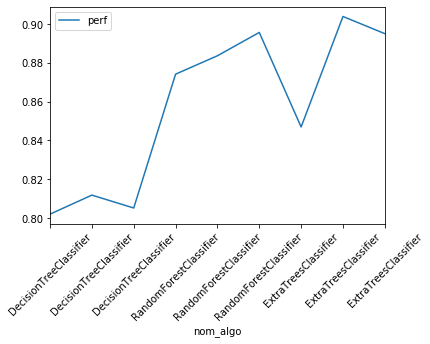

In [173]:
df.set_index("nom_algo", inplace=True)

%matplotlib inline
df[["perf"]].plot(rot=45)

Nous pouvons donc voir que nous avons un meilleur score avec le modele ExtraTreesClassifier pour un nombre d'estimateur de 10. Le RandomForest avec une seed de 1 peut aussi etre une bonne solution un peut moins performante mais apporterai plus de stabilité du résultat du a la seed.

## 6- Stability

In [0]:
r = []
for i in range(100):
    score = get_score(ExtraTreesClassifier(n_estimators=10), X_train, X_test, Y_train, Y_test )
    r.append(score)

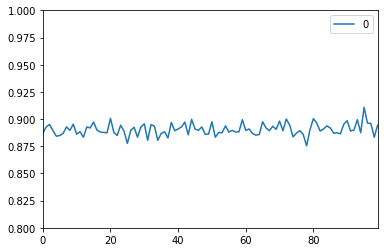

In [181]:
%matplotlib inline
import pandas as pd
_ = pd.DataFrame(r)
_.plot(ylim=[0.8,1])

Nous pouvons voir que le modèle est assez stable, il reste entre un score de 0.875 et de 0.925

# 6) Importantes features

In [0]:
algo        = ExtraTreesClassifier(n_estimators=10)
modele      = algo.fit(X_train, Y_train)
importances = modele.feature_importances_

In [0]:
df_imp          = pd.DataFrame(importances).T
df_imp.columns  = tab
df_imp          = df_imp.T.reset_index()

In [178]:
df_imp.sort_values(0, ascending=False)

,index,0
52,tGravityAcc-Min-1 \n,0.039450
56,tGravityAcc-Energy-1 \n,0.036255
53,tGravityAcc-Min-2 \n,0.027785
268,fBodyAcc-STD-1 \n,0.020334
558,tXAxisAcc-AngleWRTGravity-1 \n,0.020191
...,...,...
305,fBodyAcc-BandsEnergyOld-4 \n,0.000140
341,fBodyAcc-BandsEnergyOld-40 \n,0.000137
336,fBodyAcc-BandsEnergyOld-35 \n,0.000122
386,fBodyAccJerk-BandsEnergyOld-6 \n,0.000112


Cela nous permet de voir les features les plus importante utilisé par notre modèles